# WeRateDogs Insights

WeRateDogs is a popular twitter account poviding Professional internet Dog Rating. First created in November 2015 within a year the account already has over 705,000 followers, and its audience keeps growing, as does their love for dogs! WerRateDogs also supports numerious charities and bring awareness to important issues, such as pet neglect and inequality. There is more information and even more amazing dogs at Twitter [@dog_rates](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)

Following exploratory data analysis will use a dataset called 'twitter_archive_master.csv' with @dog_rates tweets from 2015-17, and will aim to answer following questions:
* What are main sources of tweets for We Rate Dogs account?
* Which dog stage is most liked and/or earns highest scores? 
* Which dog breed is the most popular to post?
* What is the relationship between Retweets and Favourites?
* What are the most viral tweets in the sample (most retweets and favourites)?
* Are there any trends in time or season when retweets/favourites are more prevalent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('twitter_archive_master.csv')
# Set the timestamp
df.timestamp = pd.to_datetime(df.timestamp)

## @WeRateDogs most favourite photos of dogs
| | | | | |
|-|-|-|-|-|
|![1](https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg)|![2](https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg)|![3](https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg)|![4](https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg)|![5](https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg)|

## Fun facts
The main **Source** of tweets in this set are made with Iphone, more precisely 98% from the total number of tweets in the dataset, the other two percent are shared betweet ''Twitter Web client' and 'TweetDesc', which are apps for social media management. This suggests that Matt Nelson (@dog_rates) is an Iphone owner, or at least was from 2015 - 2017. 

Twitter for iPhone    1930
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64


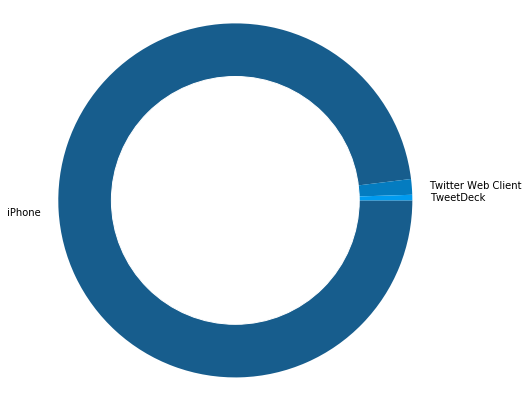

In [2]:
# Original helper code for donut plot: https://python-graph-gallery.com/donut-plot/
sizes = df.source.value_counts()
labels = 'iPhone','Twitter Web Client', 'TweetDeck'
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
# The pie chart
plt.figure(1, figsize = (7,7))
plt.pie(sizes, labels = labels, colors=['#175d8d','#047cc0','#009bef'], counterclock = False)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal');
print(sizes)

**Dog stages**. There are a lot of Doggos, and people like them a lot (mean of 19046.57 likes). But Puppos are the audience favourite, with 23326.22 likes on average. Followed by Floofers and Puppers with 13423.88 and 7427.21 average likes respectively.

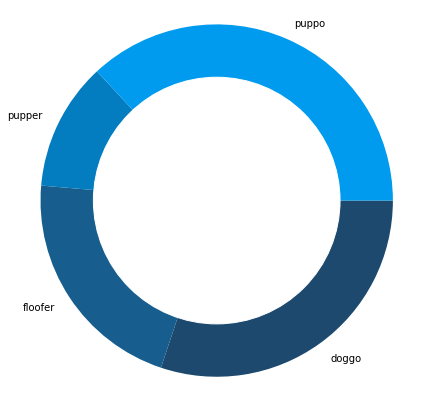

In [3]:
# Just to count the breeds, create a copy of breeds, call it 'times_posted'
df['times_posted'] = df['stage'].copy()

# Group the dataframe by dog breeds and aggregate rating and favourite/retweet counts
pop_stage = df.groupby('stage', as_index = False).agg({'favorite_count' : 'mean',
                                                           'retweet_count' : 'mean',
                                                           'rating': 'mean',
                                                           'times_posted' : 'count'})
pop_stage = pop_stage.round(decimals=2) # Looks nicer with 2 decimal points.

sizes = pop_stage.favorite_count
labels = 'doggo','floofer','pupper','puppo',
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
# The pie chart
plt.figure(1, figsize = (7,7))
plt.pie(sizes, labels = labels, colors=['#1c496d','#175d8d','#047cc0','#009bef'], counterclock = False)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal');

**Most Popular Dogs** are Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Pug. All so cute!

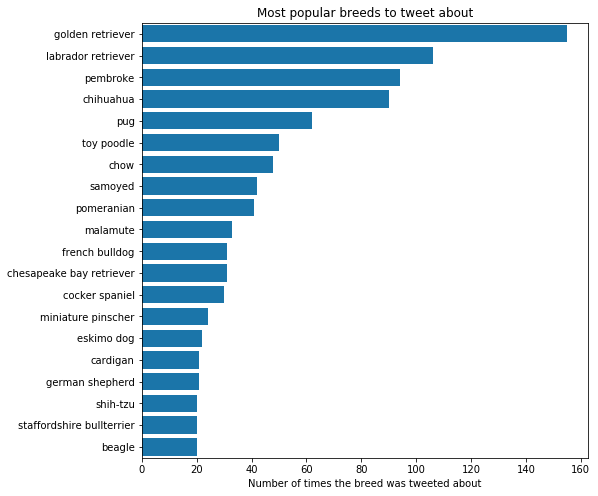

In [4]:
# Just to count the breeds, create a copy of breeds, call it 'times_posted'
df['times_posted'] = df['breed'].copy()

# Group the dataframe by dog breeds and aggregate rating and favourite/retweet counts
pop_breeds = df.groupby('breed', as_index = False).agg({'favorite_count' : 'mean',
                                                           'retweet_count' : 'mean',
                                                           'rating': 'mean',
                                                           'times_posted' : 'count'})
pop_breeds = pop_breeds.round(decimals=2) # Looks nicer with 2 decimal points.
# Trim to display top 20 dogs
top_20 = pop_breeds.sort_values('times_posted', ascending = False)[:20]
# Plot
plt.figure(1, figsize = (8, 8))
sns.barplot(top_20.times_posted, top_20.breed, color = '#047cc0')
plt.title('Most popular breeds to tweet about')
plt.xlabel('Number of times the breed was tweeted about')
plt.ylabel('');

Here is the most retweeted post from the sample, with 77,385 retweets

Here is the most favourite post from the sample, with 143,466 likes.

**Retweets and Favourites** have a very linear positive correlation which looks very close to 1. So members of audience tend to retweet and also show their love by pressing favorite button on the content. It is also interesting to note that most popular dogs receive an average amount retweets or favourites:
* Golden retrievers have 12375.62 favourites and 3699 retweets per tweet, with an average rating is 12.14 /10
* Labradors have 11687.47 favourites and 3710.08 retweets per tweet, with an average rating is 13.69 /10
* Pembrokes are also popular and have 11033.74 favourites and 3040.03 retweets per tweet, an average rating is 11.43 /10

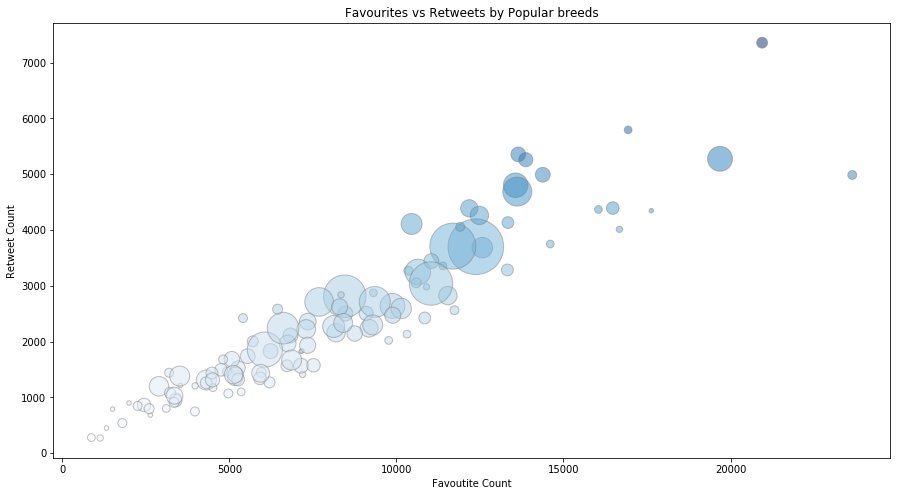

In [5]:
plt.figure(1, figsize = (15,8))

x = pop_breeds['favorite_count']
y = pop_breeds['retweet_count']
z = pop_breeds['times_posted']

plt.scatter(x, y, s=z*20, c=y, cmap='Blues', alpha = 0.5, edgecolors="grey")
plt.title('Favourites vs Retweets by Popular breeds')
plt.xlabel('Favoutite Count')
plt.ylabel('Retweet Count');

**Time trends** demonsrate how the WeRateDogs account gained it's popularity. As said in their [bio page](https://weratedogs.com/pages/about-us) the account had over 750,000 followers in less than a year! The graphs below demonstrate this rapid growth. Since Favourites and retweets have strong correlation, this is observed in how simmilar the graphs are to eachother. Also there doesn't seem to be any correlation between seasons and retweets or favourites, dog ratings are popular all year around.

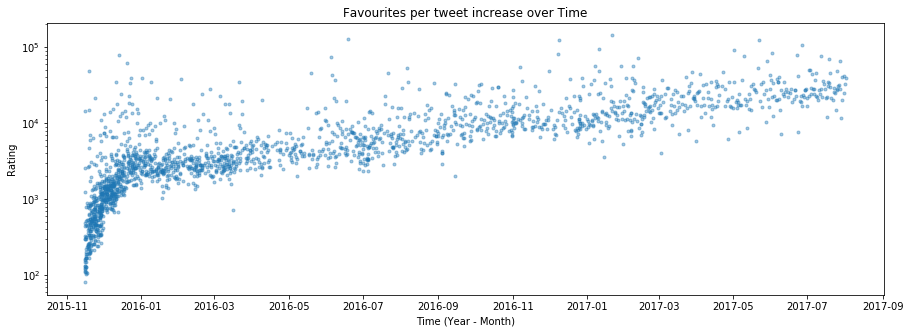

In [6]:
plt.figure(1, figsize = (15, 5))
plt.plot(df.timestamp, df.favorite_count, alpha = 0.4, marker='o', linestyle='', markersize = 3)
plt.yscale('log')
plt.title('Favourites per tweet increase over Time')
plt.ylabel('Rating')
plt.xlabel('Time (Year - Month)')
plt.show()

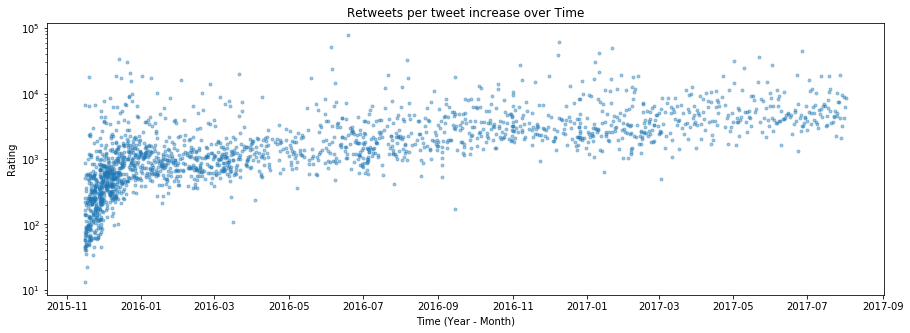

In [7]:
plt.figure(1, figsize = (15, 5))
plt.plot(df.timestamp, df.retweet_count, alpha = 0.4, marker='o', linestyle='', markersize = 3)
plt.yscale('log')
plt.title('Retweets per tweet increase over Time')
plt.ylabel('Rating')
plt.xlabel('Time (Year - Month)')
plt.show()

**Ratings** over time have been increasing from common 1-to-10 /10, to instead 1-to-$\infty$ /10 \, the later rating system has started taking place from around September 2016, which could suggest that the ["they're good dogs Brent."](http://knowyourmeme.com/memes/theyre-good-dogs-brent) story had some influence on the matter, or perhaps they all ARE just really good dogs.

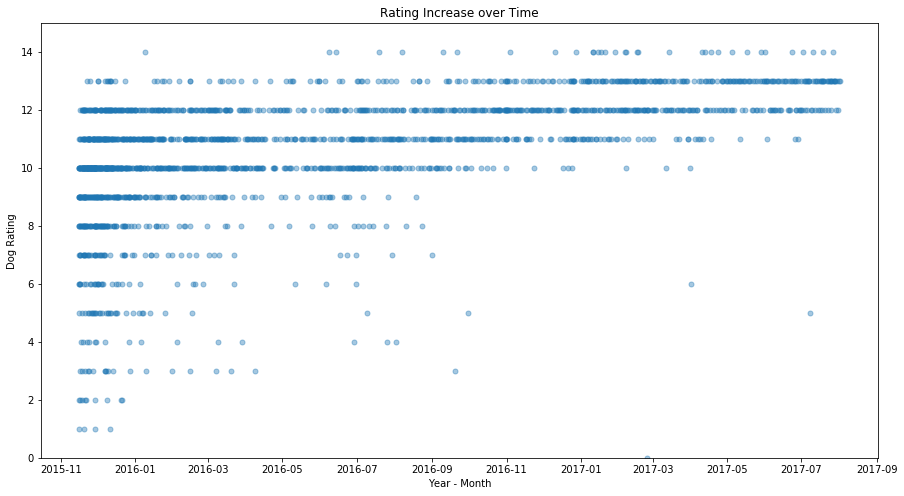

In [8]:
plt.figure(1, figsize = (15, 8))
plt.plot(df.timestamp, df.rating, alpha = 0.4, marker = 'o', linestyle='', markersize = 5)
plt.ylim(0,15)
plt.title('Rating Increase over Time')
plt.xlabel('Year - Month')
plt.ylabel('Dog Rating');

# Resources
[Hidden code button](http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/)  by the EPIC Chris Said, thank you!  
[Donut Plot](https://python-graph-gallery.com/donut-plot/) and [Bubble Plot](https://python-graph-gallery.com/bubble-plot/) Ideas from beautiful Python Graph Gallery.

#### Report created and compiled by Alina Bolat for Udacity Data Analytics Nano Degree